평균적으로 2020년 보다 2022년 여가생활을 위한 소비가 증가
- 도서와 미디어는 거의 동일
- 여행, 오락, 스포츠, 오프라인은 2022년에 상승
- 평균적으로 오프라인 문화생활과 여행의 소비 동향이 비슷하고, 2022년 기준 가장 높다.

20대
- 2020, 2021년에는 여행과 오프라인 문화생활의 소비가 대체적으로 낮은 편이었지만 2022년 이후 높아졌다.
- 오락은 꾸준히 소비가 적다.

30대
- 2020, 2021년에는 여행과 오프라인 문화생활, 스포츠의 소비가 대체적으로 낮은 편이었지만 2022년 이후 높아졌다.

40대, 50대, 60대
- 30대와 동일


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# data 불러오기
data = pd.read_excel("data/소비자동향지수_전망 2020~2023.xlsx")

# columns rename
data = data.rename(columns = {
    "분류" : "Category",
    "세부항목" : "Age",
    '2023년 01분기' : "2023_1", 
    '2022년 04분기' : "2022_4", 
    '2022년 03분기' : "2022_3",
    '2022년 02분기' : "2022_2", 
    '2022년 01분기' : "2022_1", 
    '2021년 04분기' : "2021_4", 
    '2021년 03분기' : "2021_3", 
    '2021년 02분기' : "2021_2",
    '2021년 01분기' : "2021_1", 
    '2020년 04분기' : "2020_4", 
    '2020년 03분기' : "2020_3", 
    '2020년 02분기' : "2020_2", 
    '2020년 01분기' : "2020_1"
})

# 필요한 columns select
data = data[['Category', 'Age', '2023_1', '2022_4', '2022_3', '2022_2',
       '2022_1', '2021_4', '2021_3', '2021_2', '2021_1', '2020_4', '2020_3',
       '2020_2', '2020_1']]

#--------------------------------columns 결합 --------------------------------
# 스포츠 결합
data_sports = data[(data.Category == "스포츠경기 관람료")|
     (data.Category == "스포츠시설 이용료")|
    (data.Category == "스포츠기구 구입비")|
    (data.Category == "아웃도어용품 구입비")]
data_sports = data_sports.drop(["Category"], axis = 1)
data_sports = data_sports.groupby(data_sports['Age']).mean()   
data_sports["Category"] = "스포츠"
data_sports = data_sports.reset_index()

# 여행 결합
data_travel = data[(data.Category == "관광·여행비")|
     (data.Category == "해외 여행비")|
    (data.Category == "국내 여행비")]
data_travel = data_travel.drop(["Category"], axis = 1)
data_travel = data_travel.groupby(data_travel['Age']).mean()   
data_travel["Category"] = "여행"
data_travel = data_travel.reset_index()

# 오락 결합
data_game = data[(data.Category == "오락시설 이용료")|
     (data.Category == "오락용품 구입비")]
data_game = data_game.drop(["Category"], axis = 1)
data_game = data_game.groupby(data_game['Age']).mean()   
data_game["Category"] = "오락"
data_game = data_game.reset_index()

# 미디어 결합
data_media = data[(data.Category == "온라인 문화생활비")|
     (data.Category == "미디어기기 구입비")]
data_media = data_media.drop(["Category"], axis = 1)
data_media = data_media.groupby(data_media['Age']).mean()
data_media["Category"] = "미디어"
data_media = data_media.reset_index()

# 오프라인 결합
data_offline = data[(data.Category == "오프라인 문화생활비")]
data_offline = data_offline.drop(["Category"], axis = 1)
data_offline["Category"] = "오프라인문화생활"
data_offline = data_offline.reset_index(drop=True)

# 기타 결합
data_etc = data[(data.Category == "도서 구입비")]
data_etc = data_etc.drop(["Category"], axis = 1)
data_etc["Category"] = "기타"
data_etc = data_etc.reset_index(drop=True)

# 데이터 결합하기
# col = [data_sports, data_game, data_media, data_offline, data_etc] # 여행 제외 버전
col = [data_sports, data_travel, data_game, data_media, data_offline, data_etc]
data_correct = pd.concat(col)
data_correct = data_correct[['Category', 'Age', '2022_4', '2022_3', '2022_2', '2022_1', '2021_4',
       '2021_3', '2021_2', '2021_1', '2020_4', '2020_3', '2020_2', '2020_1']]

# 연령별 데이터 추출
data_All = data_correct[data_correct.Age == "전체"].drop(["Age"], axis=1)
data_All = pd.melt(data_All, id_vars=['Category'], value_vars=['2022_4', '2022_3', '2022_2', '2022_1', '2021_4', '2021_3',
       '2021_2', '2021_1', '2020_4', '2020_3', '2020_2', '2020_1'])
data_20 = data_correct[data_correct.Age == "20대"].drop(["Age"], axis=1)
data_20 = pd.melt(data_20, id_vars=['Category'], value_vars=['2022_4', '2022_3', '2022_2', '2022_1', '2021_4', '2021_3',
       '2021_2', '2021_1', '2020_4', '2020_3', '2020_2', '2020_1'])
data_30 = data_correct[data_correct.Age == "30대"].drop(["Age"], axis=1)
data_30 = pd.melt(data_30, id_vars=['Category'], value_vars=['2022_4', '2022_3', '2022_2', '2022_1', '2021_4', '2021_3',
       '2021_2', '2021_1', '2020_4', '2020_3', '2020_2', '2020_1'])
data_40 = data_correct[data_correct.Age == "40대"].drop(["Age"], axis=1)
data_40 = pd.melt(data_40, id_vars=['Category'], value_vars=['2022_4', '2022_3', '2022_2', '2022_1', '2021_4', '2021_3',
       '2021_2', '2021_1', '2020_4', '2020_3', '2020_2', '2020_1'])
data_50 = data_correct[data_correct.Age == "50대"].drop(["Age"], axis=1)
data_50 = pd.melt(data_50, id_vars=['Category'], value_vars=['2022_4', '2022_3', '2022_2', '2022_1', '2021_4', '2021_3',
       '2021_2', '2021_1', '2020_4', '2020_3', '2020_2', '2020_1'])
data_60 = data_correct[data_correct.Age == "60대 이상"].drop(["Age"], axis=1)
data_60 = pd.melt(data_60, id_vars=['Category'], value_vars=['2022_4', '2022_3', '2022_2', '2022_1', '2021_4', '2021_3',
       '2021_2', '2021_1', '2020_4', '2020_3', '2020_2', '2020_1'])


In [49]:
data_etc

,Age,2023_1,2022_4,2022_3,2022_2,2022_1,2021_4,2021_3,2021_2,2021_1,2020_4,2020_3,2020_2,2020_1,Category
0,전체,104.4,105.1,106.0,108.9,108.1,104.9,107.4,104.3,104.5,105.5,105.0,103.7,102.5,기타
1,20대,103.4,103.0,112.0,110.4,105.9,106.3,109.2,102.4,109.5,111.6,106.5,107.2,104.6,기타
2,30대,104.8,105.1,105.8,110.9,111.0,104.0,106.6,112.0,105.9,106.4,105.9,105.7,102.9,기타
3,40대,107.2,105.7,107.2,109.3,112.0,108.3,111.0,107.6,107.1,108.3,106.8,106.4,108.1,기타
4,50대,104.1,106.9,106.9,108.9,107.2,105.1,107.3,101.3,103.2,104.2,104.7,103.1,100.8,기타
5,60대 이상,102.3,103.1,101.8,106.5,103.9,101.2,103.4,99.6,100.1,100.8,101.9,98.4,96.8,기타


In [24]:
off = data_correct[data_correct.Category == "오프라인문화생활"]
off[off.Age == "20대"].iloc[0][1:]

Age         20대
2022_4    107.8
2022_3    117.2
2022_2    111.9
2022_1     96.0
2021_4    101.7
2021_3    113.1
2021_2     94.5
2021_1     95.7
2020_4     96.8
2020_3    102.6
2020_2     92.7
2020_1    103.5
Name: 1, dtype: object

Text(0.5, 1.0, '소비자 동향 지수 - 평균(연령)')

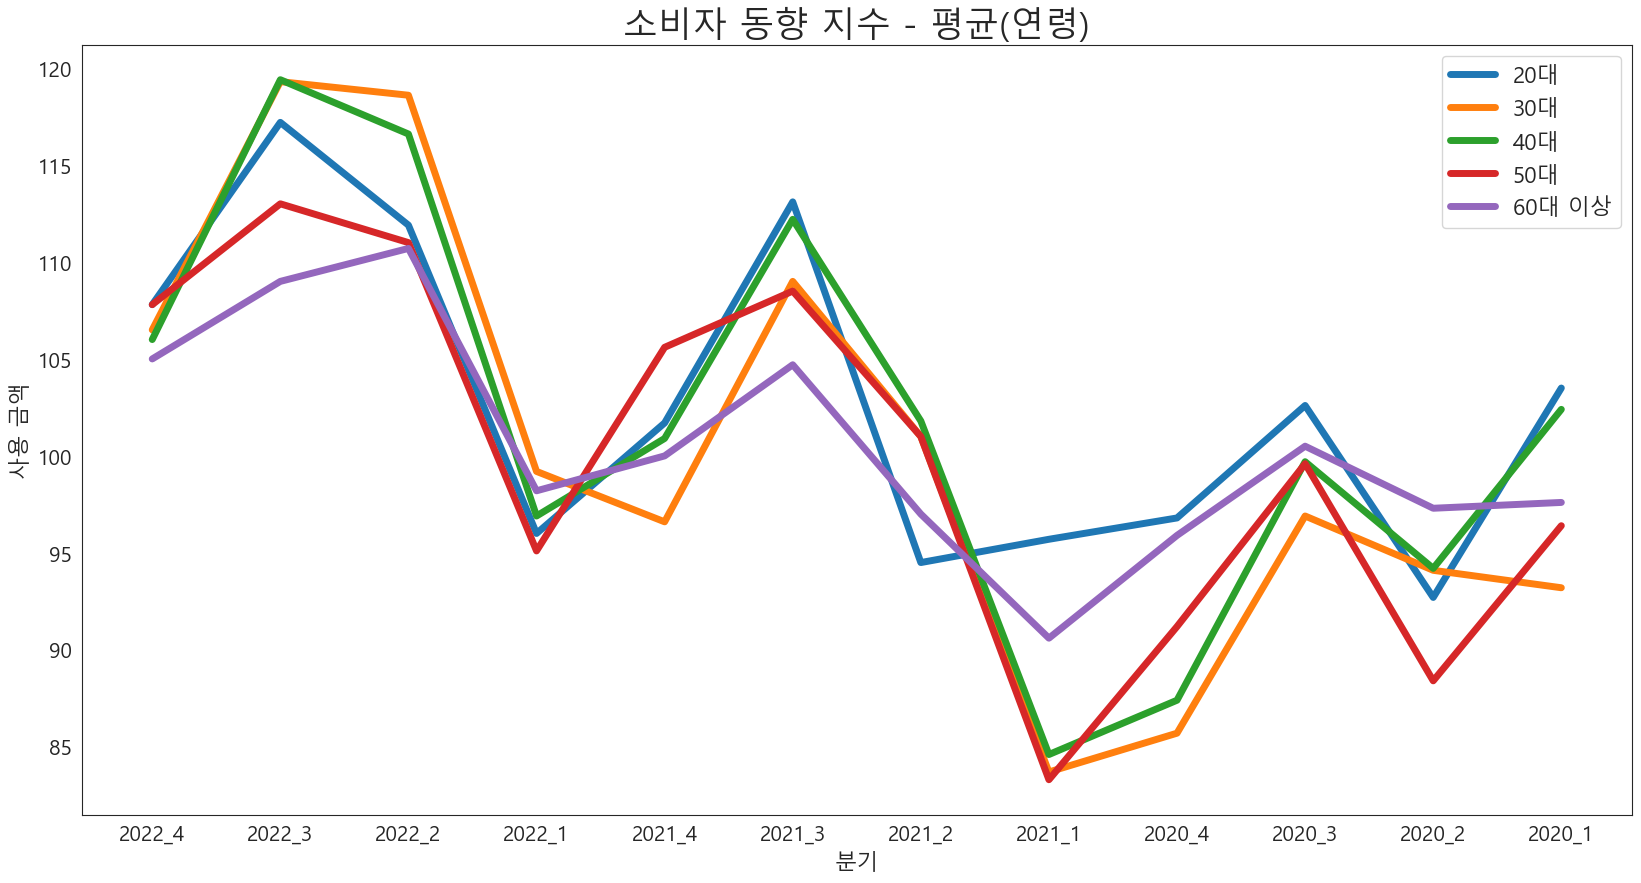

In [25]:
from matplotlib import font_manager, rc
# font_manager.findSystemFonts(fontpaths = None, fontext = "ttf")
font_path  = "C:\Windows\Fonts\malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(off.columns[2:], off[off.Age == "20대"].iloc[0][2:].values, label="20대", linewidth = 5) 
plt.plot(off.columns[2:], off[off.Age == "30대"].iloc[0][2:].values, label="30대", linewidth = 5) 
plt.plot(off.columns[2:], off[off.Age == "40대"].iloc[0][2:].values, label="40대", linewidth = 5) 
plt.plot(off.columns[2:], off[off.Age == "50대"].iloc[0][2:].values, label="50대", linewidth = 5) 
plt.plot(off.columns[2:], off[off.Age == "60대 이상"].iloc[0][2:].values, label="60대 이상", linewidth = 5) 

plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 평균(연령)", fontsize = 25)

In [26]:
m = data_correct[data_correct.Age != "전체"].groupby("Category").mean()
m = m.reset_index()


Text(0.5, 1.0, '소비자 동향 지수 - 평균(연령)')

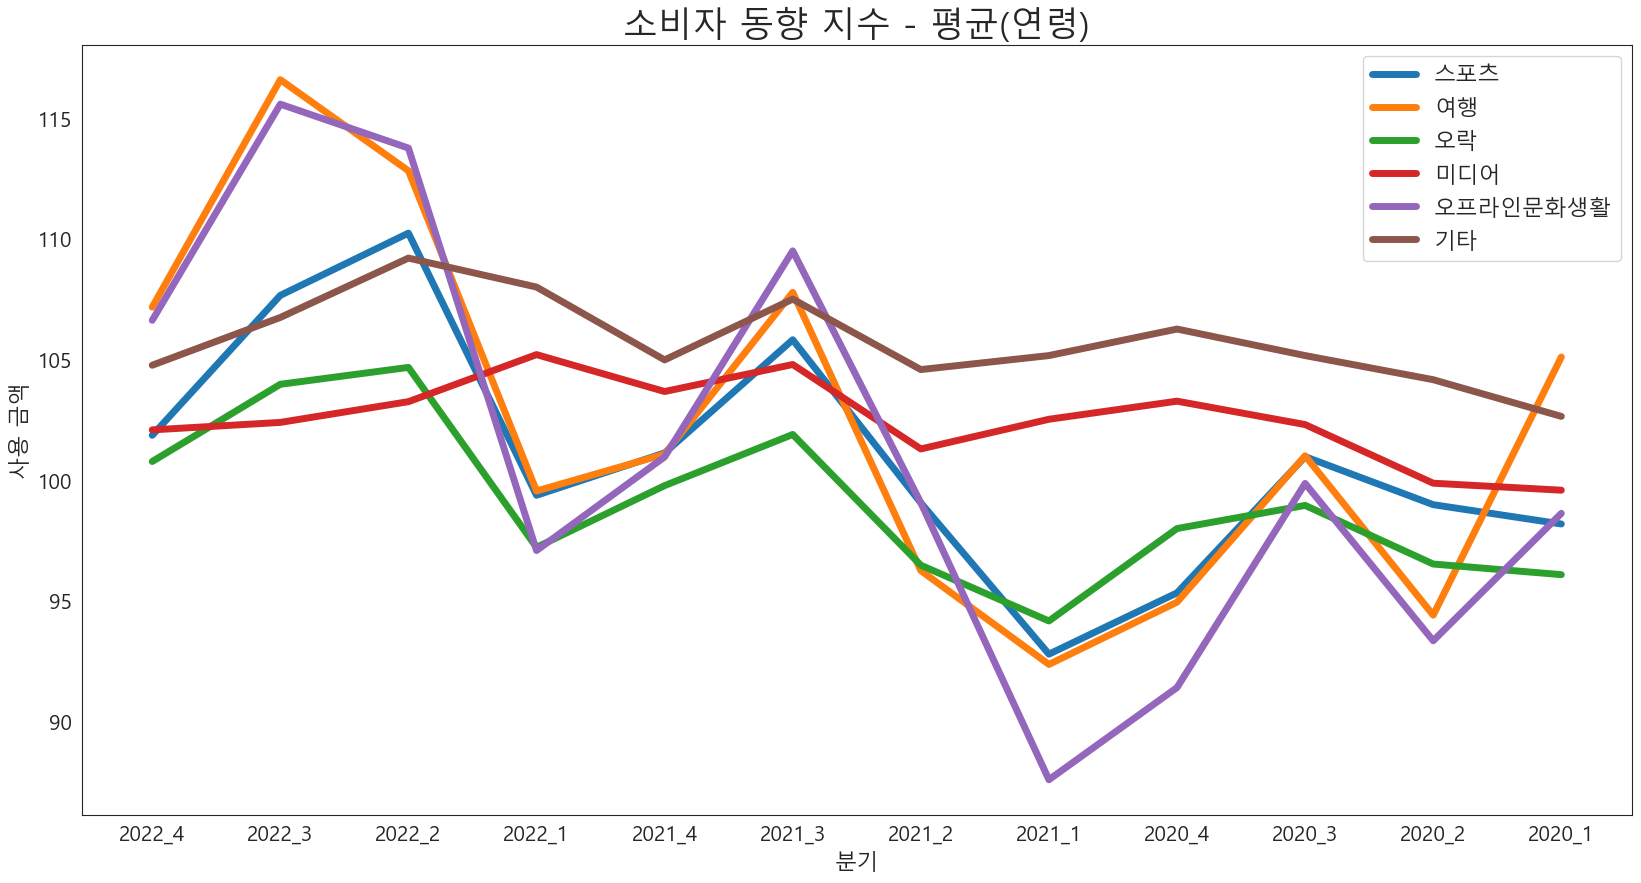

In [27]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(m.columns[1:], m[m.Category == "스포츠"].iloc[0][1:].values, label="스포츠", linewidth = 5) 
plt.plot(m.columns[1:], m[m.Category == "여행"].iloc[0][1:], label="여행", linewidth = 5) 
plt.plot(m.columns[1:], m[m.Category == "오락"].iloc[0][1:], label="오락", linewidth = 5) 
plt.plot(m.columns[1:], m[m.Category == "미디어"].iloc[0][1:], label="미디어", linewidth = 5) 
plt.plot(m.columns[1:], m[m.Category == "오프라인문화생활"].iloc[0][1:],label="오프라인문화생활", linewidth = 5)  
plt.plot(m.columns[1:], m[m.Category == "기타"].iloc[0][1:], label="기타", linewidth = 5) 
plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 평균(연령)", fontsize = 25)

In [28]:
from matplotlib import font_manager, rc
# font_manager.findSystemFonts(fontpaths = None, fontext = "ttf")
font_path  = "C:\Windows\Fonts\malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 연령별

Text(0.5, 1.0, '소비자 동향 지수 : 전체 연령 - 전체')

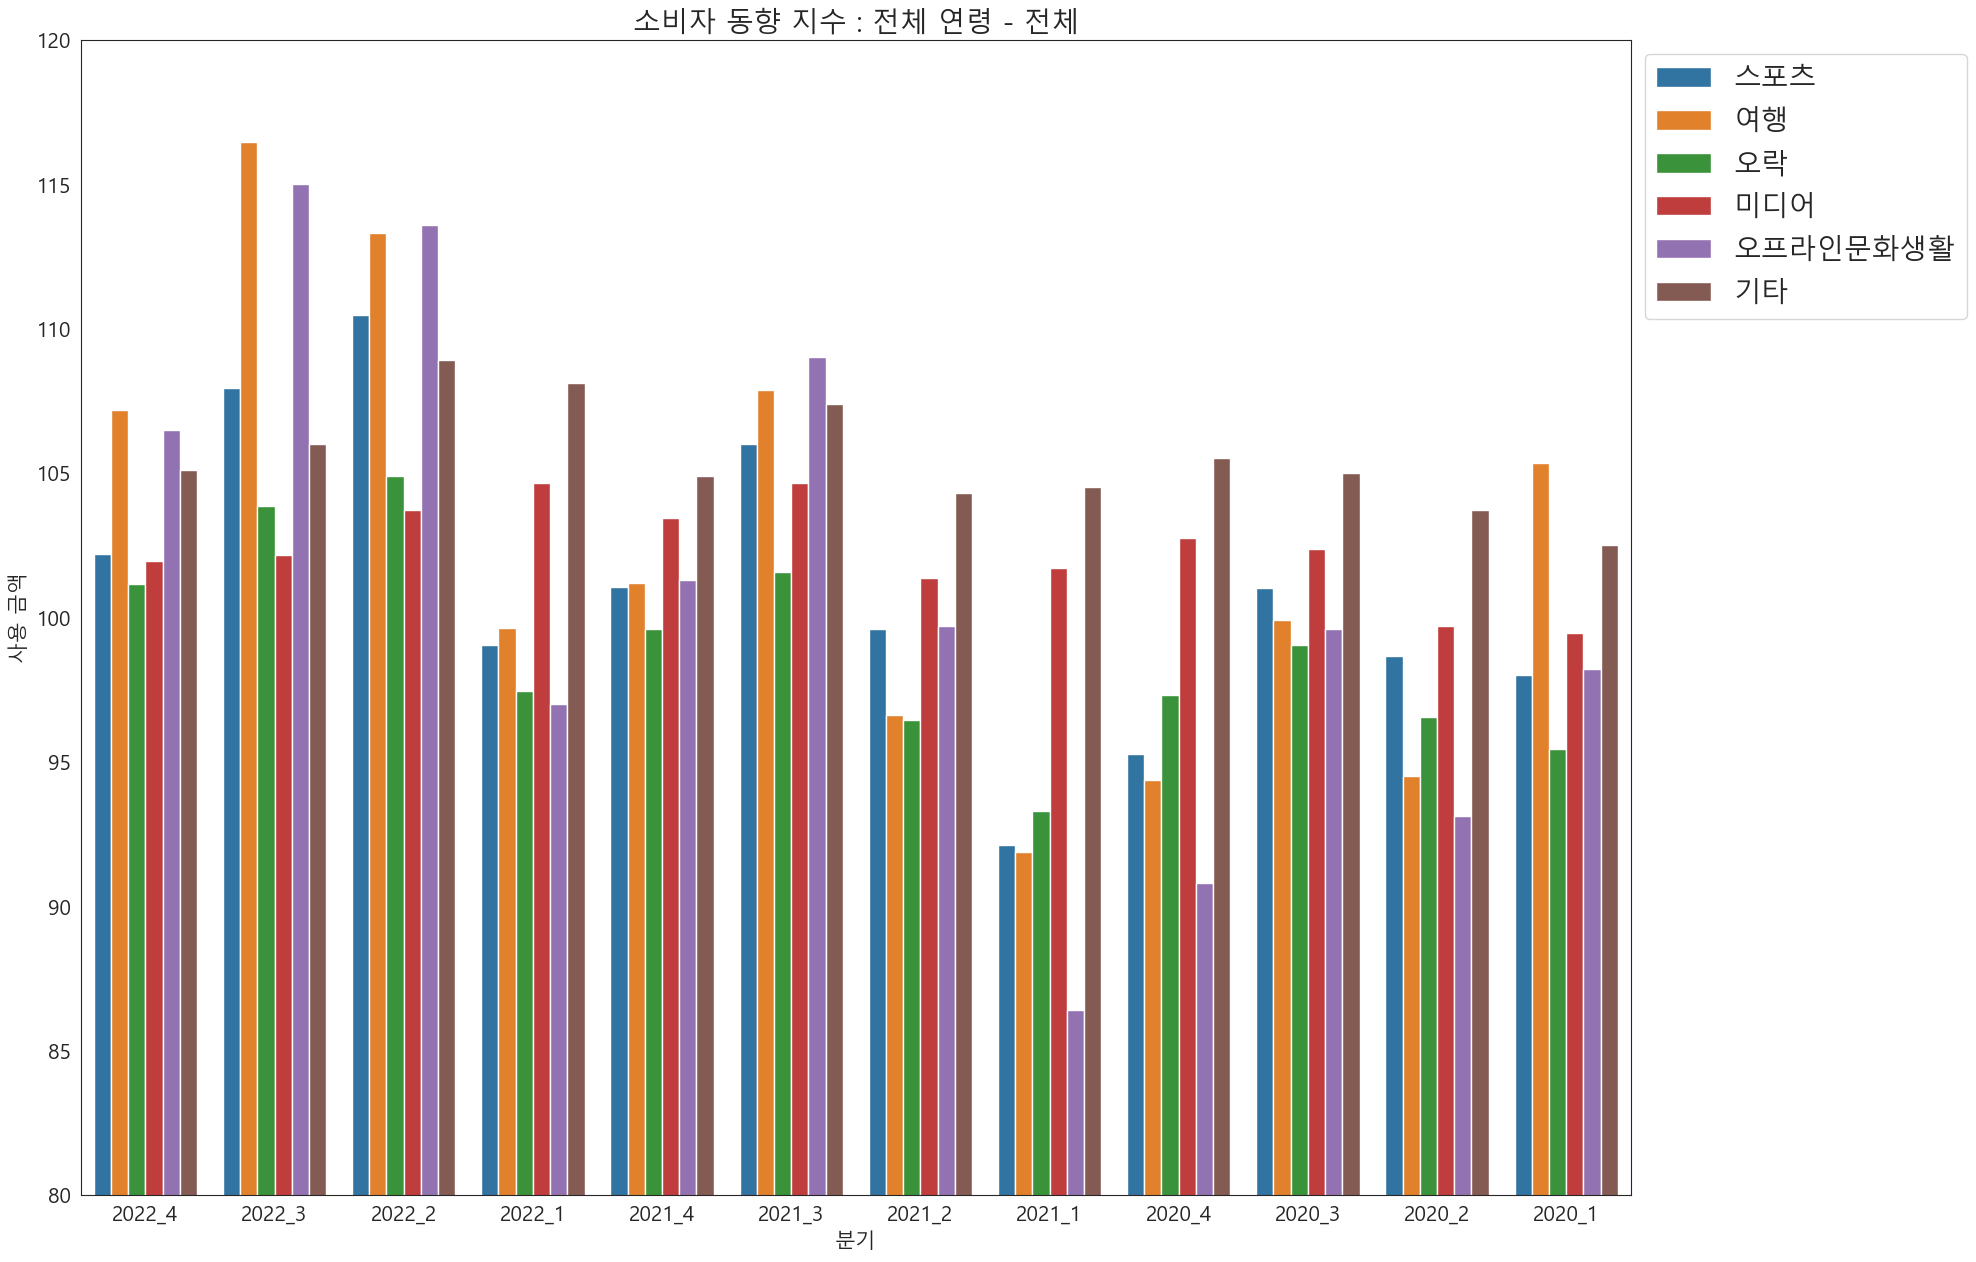

In [29]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 전체 카테고리
plt.figure(figsize=(20,15))
ax = sns.barplot(x="variable", y="value", hue = "Category", data=data_All)
plt.legend(loc = 2, bbox_to_anchor = (1,1), fontsize = 20)
plt.ylim(80, 120)
plt.xlabel("분기", fontsize = 15)
plt.ylabel("사용 금액", fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.title("소비자 동향 지수 : 전체 연령 - 전체", fontsize = 20)

In [41]:
df_sports = data_All[data_All.Category == "스포츠"]
df_travel = data_All[data_All.Category == "여행"]
df_game = data_All[data_All.Category == "오락"]
df_media = data_All[data_All.Category == "미디어"]
df_offline = data_All[data_All.Category == "오프라인문화생활"]
df_etc = data_All[data_All.Category == "기타"]

In [43]:
df_sports.variable

0     2022_4
6     2022_3
12    2022_2
18    2022_1
24    2021_4
30    2021_3
36    2021_2
42    2021_1
48    2020_4
54    2020_3
60    2020_2
66    2020_1
Name: variable, dtype: object

In [45]:
df_sports.variable

66    2020_1
60    2020_2
54    2020_3
48    2020_4
42    2021_1
36    2021_2
30    2021_3
24    2021_4
18    2022_1
12    2022_2
6     2022_3
0     2022_4
Name: variable, dtype: object

<Figure size 2000x3000 with 0 Axes>

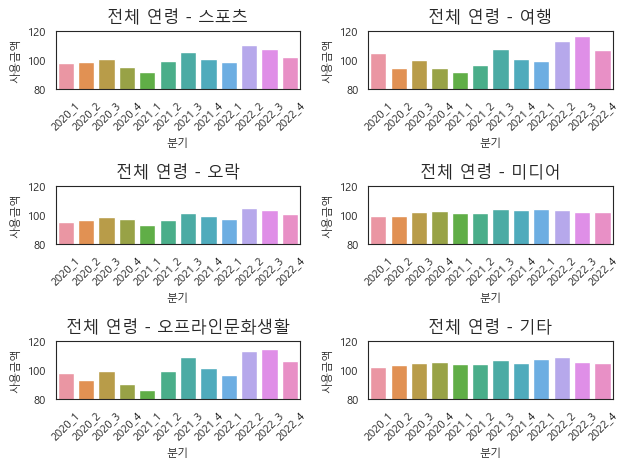

In [47]:
df_sports = data_All[data_All.Category == "스포츠"]
df_travel = data_All[data_All.Category == "여행"]
df_game = data_All[data_All.Category == "오락"]
df_media = data_All[data_All.Category == "미디어"]
df_offline = data_All[data_All.Category == "오프라인문화생활"]
df_etc = data_All[data_All.Category == "기타"]


df_sports = df_sports.sort_values("variable")
df_travel = df_travel.sort_values("variable")
df_game = df_game.sort_values("variable")
df_media = df_media.sort_values("variable")
df_offline = df_offline.sort_values("variable")
df_etc = df_etc.sort_values("variable")

plt.figure(figsize=(20,30))
fig, axes = plt.subplots(3,2)
sns.set_style("white")

# 스포츠
sns.barplot(x="variable", y="value", data=df_sports, ci = None, ax=axes[0][0])
axes[0][0].set_ylim(80, 120)
axes[0][0].set_xlabel("분기", fontsize = 8)
axes[0][0].set_ylabel("사용금액", fontsize = 8)
axes[0][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][0].tick_params(axis="y", labelsize=8) 
axes[0][0].set_title("전체 연령 - 스포츠", fontsize = 12)

# 여행
sns.barplot(x="variable", y="value", data=df_travel, ci = None, ax=axes[0][1])
axes[0][1].set_ylim(80, 120)
axes[0][1].set_xlabel("분기", fontsize = 8)
axes[0][1].set_ylabel("사용금액", fontsize = 8)
axes[0][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][1].tick_params(axis="y", labelsize=8) 
axes[0][1].set_title("전체 연령 - 여행", fontsize = 12)

# 오락
sns.barplot(x="variable", y="value", data=df_game, ci = None, ax=axes[1][0])
axes[1][0].set_ylim(80, 120)
axes[1][0].set_xlabel("분기", fontsize = 8)
axes[1][0].set_ylabel("사용금액", fontsize = 8)
axes[1][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][0].tick_params(axis="y", labelsize=8) 
axes[1][0].set_title("전체 연령 - 오락", fontsize = 12)

# 미디어
sns.barplot(x="variable", y="value", data=df_media, ci = None, ax=axes[1][1])
axes[1][1].set_ylim(80, 120)
axes[1][1].set_xlabel("분기", fontsize = 8)
axes[1][1].set_ylabel("사용금액", fontsize = 8)
axes[1][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][1].tick_params(axis="y", labelsize=8) 
axes[1][1].set_title("전체 연령 - 미디어", fontsize = 12)

# 오프라인
sns.barplot(x="variable", y="value", data=df_offline, ci = None, ax=axes[2][0])
axes[2][0].set_ylim(80, 120)
axes[2][0].set_xlabel("분기", fontsize = 8)
axes[2][0].set_ylabel("사용금액", fontsize = 8)
axes[2][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][0].tick_params(axis="y", labelsize=8) 
axes[2][0].set_title("전체 연령 - 오프라인문화생활", fontsize = 12)


# 기타
sns.barplot(x="variable", y="value", data=df_etc, ci = None, ax=axes[2][1])
axes[2][1].set_ylim(80, 120)
axes[2][1].set_xlabel("분기", fontsize = 8)
axes[2][1].set_ylabel("사용금액", fontsize = 8)
axes[2][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][1].tick_params(axis="y", labelsize=8) 
axes[2][1].set_title("전체 연령 - 기타", fontsize = 12)
fig.tight_layout()


Text(0.5, 1.0, '소비자 동향 지수 - 전체 연령')

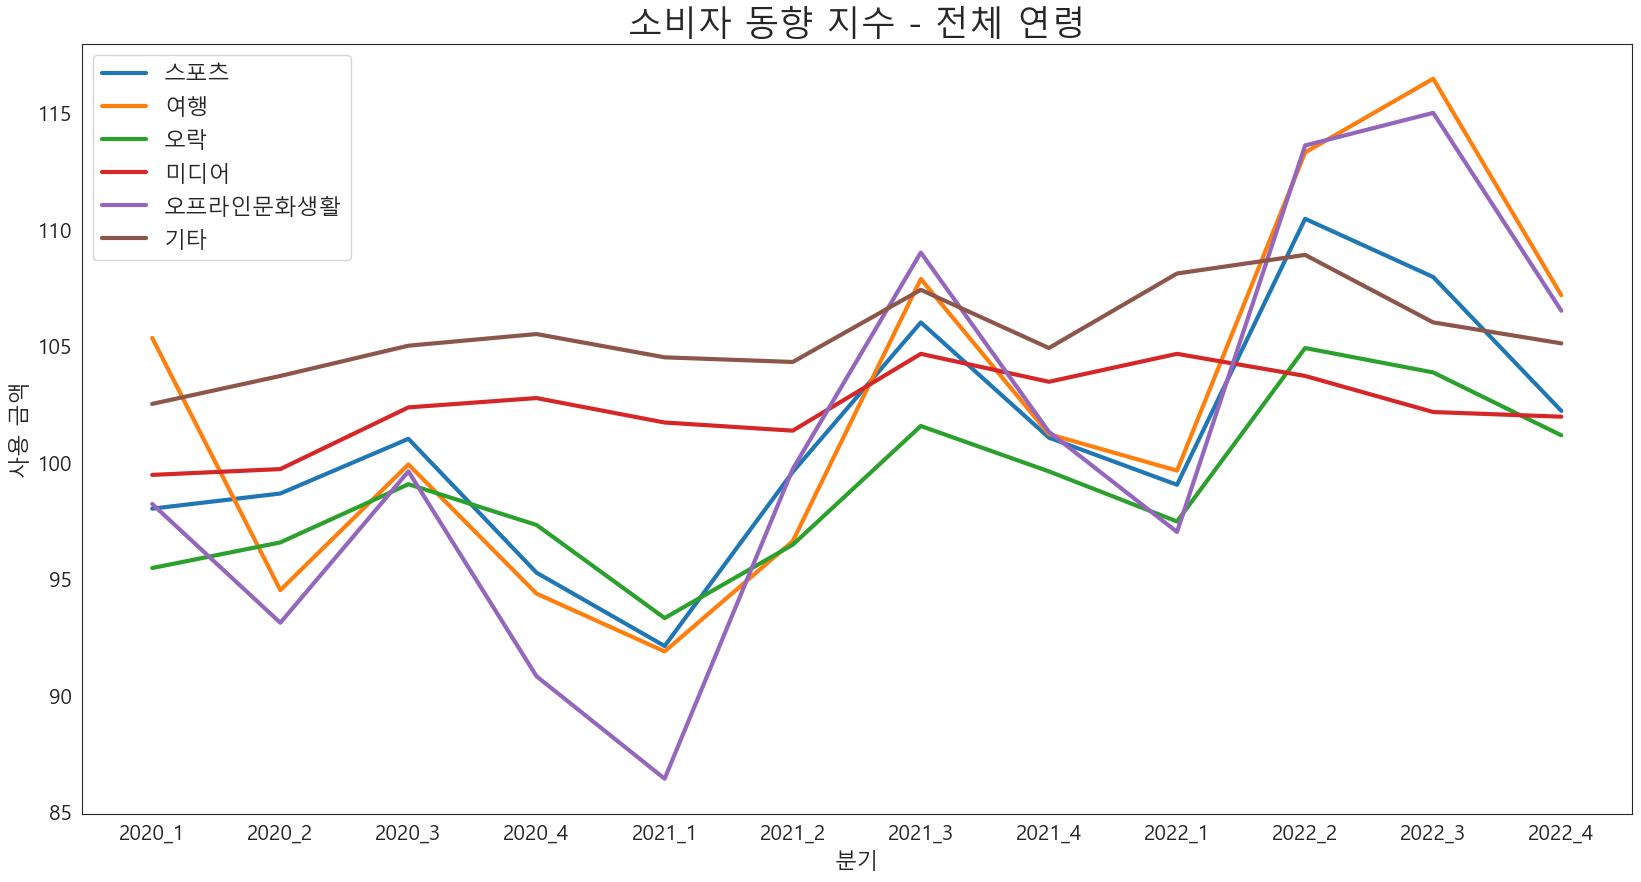

In [48]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(df_sports.quarter.values, df_sports.value, label="스포츠", linewidth = 3) 
plt.plot(df_travel.quarter.values, df_travel.value, label="여행", linewidth = 3) 
plt.plot(df_game.quarter.values, df_game.value, label="오락", linewidth = 3) 
plt.plot(df_media.quarter.values, df_media.value, label="미디어", linewidth = 3) 
plt.plot(df_offline.quarter.values, df_offline.value, label="오프라인문화생활", linewidth = 3) 
plt.plot(df_etc.quarter.values, df_etc.value, label="기타", linewidth = 3) 
plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 전체 연령", fontsize = 25)

<Figure size 2000x3000 with 0 Axes>

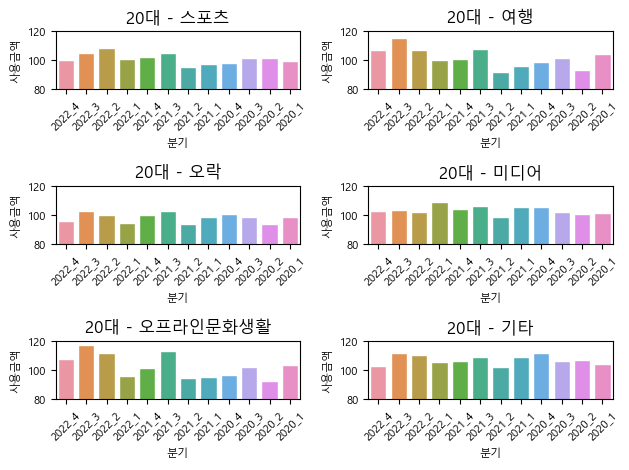

In [12]:
df_sports = data_20[data_20.Category == "스포츠"]
df_travel = data_20[data_20.Category == "여행"]
df_game = data_20[data_20.Category == "오락"]
df_media = data_20[data_20.Category == "미디어"]
df_offline = data_20[data_20.Category == "오프라인문화생활"]
df_etc = data_20[data_20.Category == "기타"]

plt.figure(figsize=(20,30))
fig, axes = plt.subplots(3,2)
rc('font', family=font)
sns.set_style("white")


# 스포츠
sns.barplot(x="variable", y="value", data=df_sports, ci = None, ax=axes[0][0])
axes[0][0].set_ylim(80, 120)
axes[0][0].set_xlabel("분기", fontsize = 8)
axes[0][0].set_ylabel("사용금액", fontsize = 8)
axes[0][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][0].tick_params(axis="y", labelsize=8) 
axes[0][0].set_title("20대 - 스포츠", fontsize = 12)

# 여행
sns.barplot(x="variable", y="value", data=df_travel, ci = None, ax=axes[0][1])
axes[0][1].set_ylim(80, 120)
axes[0][1].set_xlabel("분기", fontsize = 8)
axes[0][1].set_ylabel("사용금액", fontsize = 8)
axes[0][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][1].tick_params(axis="y", labelsize=8) 
axes[0][1].set_title("20대 - 여행", fontsize = 12)

# 오락
sns.barplot(x="variable", y="value", data=df_game, ci = None, ax=axes[1][0])
axes[1][0].set_ylim(80, 120)
axes[1][0].set_xlabel("분기", fontsize = 8)
axes[1][0].set_ylabel("사용금액", fontsize = 8)
axes[1][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][0].tick_params(axis="y", labelsize=8) 
axes[1][0].set_title("20대 - 오락", fontsize = 12)

# 미디어
sns.barplot(x="variable", y="value", data=df_media, ci = None, ax=axes[1][1])
axes[1][1].set_ylim(80, 120)
axes[1][1].set_xlabel("분기", fontsize = 8)
axes[1][1].set_ylabel("사용금액", fontsize = 8)
axes[1][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][1].tick_params(axis="y", labelsize=8) 
axes[1][1].set_title("20대 - 미디어", fontsize = 12)

# 오프라인
sns.barplot(x="variable", y="value", data=df_offline, ci = None, ax=axes[2][0])
axes[2][0].set_ylim(80, 120)
axes[2][0].set_xlabel("분기", fontsize = 8)
axes[2][0].set_ylabel("사용금액", fontsize = 8)
axes[2][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][0].tick_params(axis="y", labelsize=8) 
axes[2][0].set_title("20대 - 오프라인문화생활", fontsize = 12)


# 기타
sns.barplot(x="variable", y="value", data=df_etc, ci = None, ax=axes[2][1])
axes[2][1].set_ylim(80, 120)
axes[2][1].set_xlabel("분기", fontsize = 8)
axes[2][1].set_ylabel("사용금액", fontsize = 8)
axes[2][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][1].tick_params(axis="y", labelsize=8) 
axes[2][1].set_title("20대 - 기타", fontsize = 12)
fig.tight_layout()

Text(0.5, 1.0, '소비자 동향 지수 - 20대')

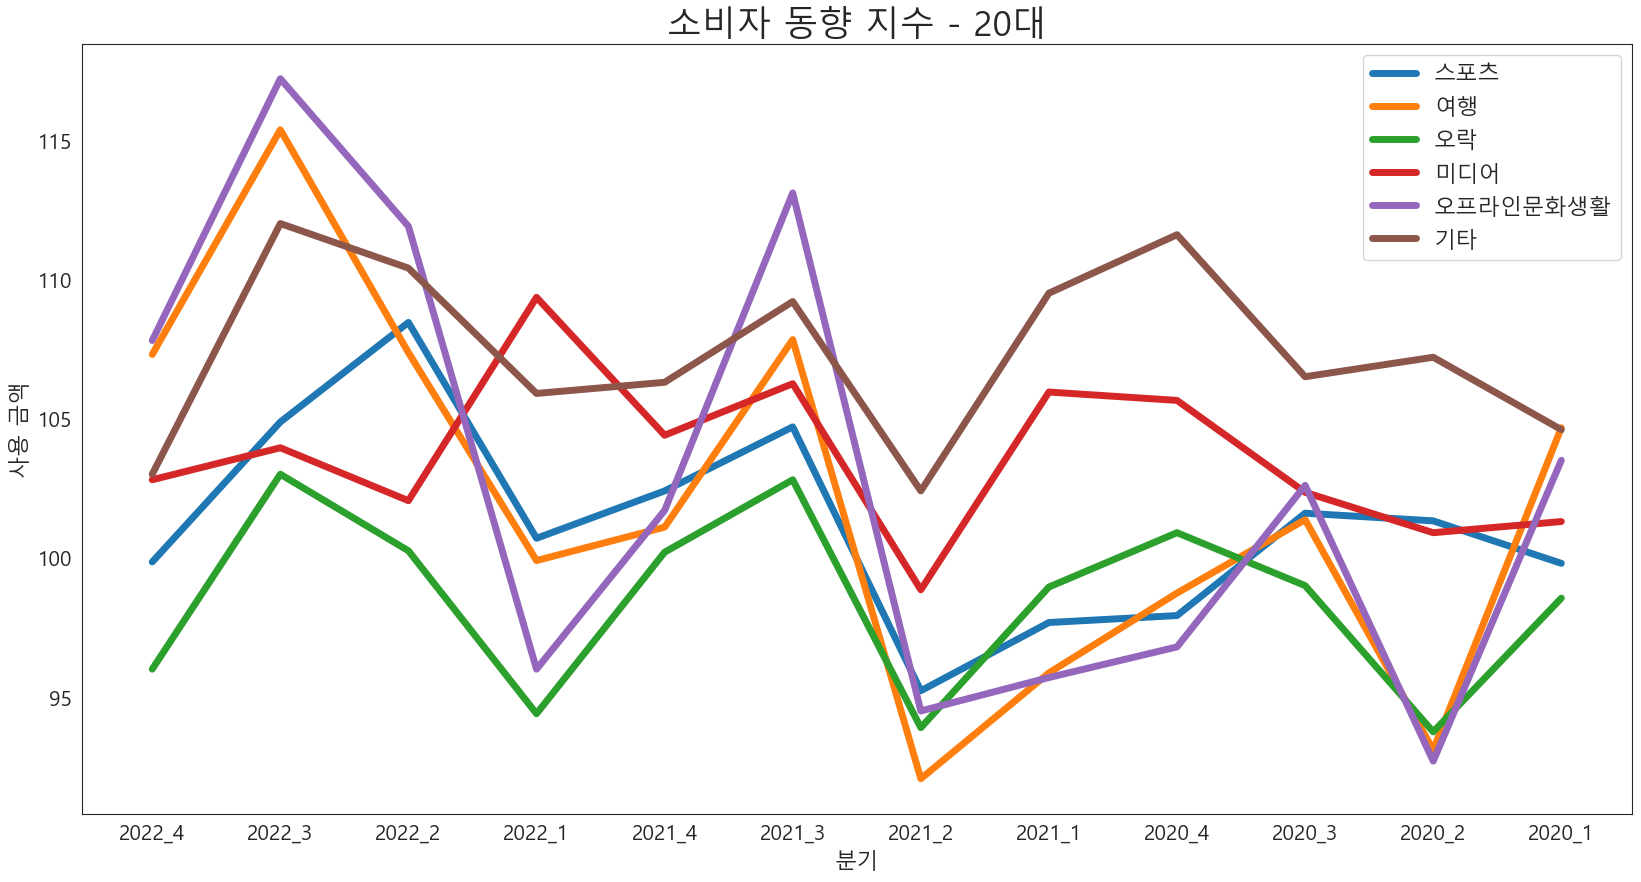

In [13]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(df_sports.variable.values, df_sports.value, label="스포츠", linewidth = 5) 
plt.plot(df_travel.variable.values, df_travel.value, label="여행", linewidth = 5) 
plt.plot(df_game.variable.values, df_game.value, label="오락", linewidth = 5) 
plt.plot(df_media.variable.values, df_media.value, label="미디어", linewidth = 5) 
plt.plot(df_offline.variable.values, df_offline.value, label="오프라인문화생활", linewidth = 5) 
plt.plot(df_etc.variable.values, df_etc.value, label="기타", linewidth = 5) 
plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 20대", fontsize = 25)

<Figure size 2000x3000 with 0 Axes>

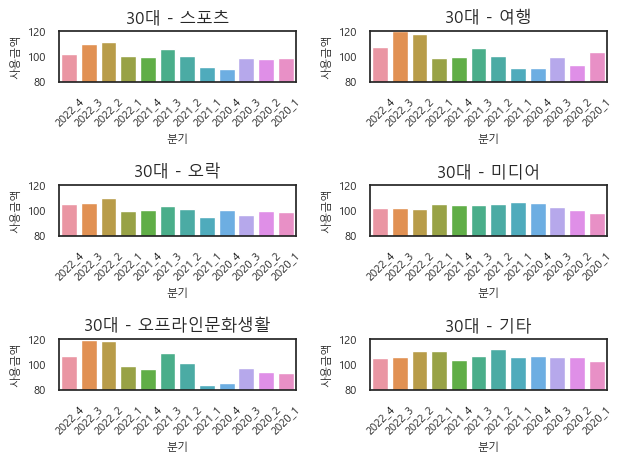

In [376]:
df_sports = data_30[data_30.Category == "스포츠"]
df_travel = data_30[data_30.Category == "여행"]
df_game = data_30[data_30.Category == "오락"]
df_media = data_30[data_30.Category == "미디어"]
df_offline = data_30[data_30.Category == "오프라인문화생활"]
df_etc = data_30[data_30.Category == "기타"]

plt.figure(figsize=(20,30))
fig, axes = plt.subplots(3,2)
rc('font', family=font)
sns.set_style("white")


# 스포츠
sns.barplot(x="variable", y="value", data=df_sports, ci = None, ax=axes[0][0])
axes[0][0].set_ylim(80, 120)
axes[0][0].set_xlabel("분기", fontsize = 8)
axes[0][0].set_ylabel("사용금액", fontsize = 8)
axes[0][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][0].tick_params(axis="y", labelsize=8) 
axes[0][0].set_title("30대 - 스포츠", fontsize = 12)

# 여행
sns.barplot(x="variable", y="value", data=df_travel, ci = None, ax=axes[0][1])
axes[0][1].set_ylim(80, 120)
axes[0][1].set_xlabel("분기", fontsize = 8)
axes[0][1].set_ylabel("사용금액", fontsize = 8)
axes[0][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][1].tick_params(axis="y", labelsize=8) 
axes[0][1].set_title("30대 - 여행", fontsize = 12)

# 오락
sns.barplot(x="variable", y="value", data=df_game, ci = None, ax=axes[1][0])
axes[1][0].set_ylim(80, 120)
axes[1][0].set_xlabel("분기", fontsize = 8)
axes[1][0].set_ylabel("사용금액", fontsize = 8)
axes[1][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][0].tick_params(axis="y", labelsize=8) 
axes[1][0].set_title("30대 - 오락", fontsize = 12)

# 미디어
sns.barplot(x="variable", y="value", data=df_media, ci = None, ax=axes[1][1])
axes[1][1].set_ylim(80, 120)
axes[1][1].set_xlabel("분기", fontsize = 8)
axes[1][1].set_ylabel("사용금액", fontsize = 8)
axes[1][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][1].tick_params(axis="y", labelsize=8) 
axes[1][1].set_title("30대 - 미디어", fontsize = 12)

# 오프라인
sns.barplot(x="variable", y="value", data=df_offline, ci = None, ax=axes[2][0])
axes[2][0].set_ylim(80, 120)
axes[2][0].set_xlabel("분기", fontsize = 8)
axes[2][0].set_ylabel("사용금액", fontsize = 8)
axes[2][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][0].tick_params(axis="y", labelsize=8) 
axes[2][0].set_title("30대 - 오프라인문화생활", fontsize = 12)


# 기타
sns.barplot(x="variable", y="value", data=df_etc, ci = None, ax=axes[2][1])
axes[2][1].set_ylim(80, 120)
axes[2][1].set_xlabel("분기", fontsize = 8)
axes[2][1].set_ylabel("사용금액", fontsize = 8)
axes[2][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][1].tick_params(axis="y", labelsize=8) 
axes[2][1].set_title("30대 - 기타", fontsize = 12)
fig.tight_layout()

Text(0.5, 1.0, '소비자 동향 지수 - 30대')

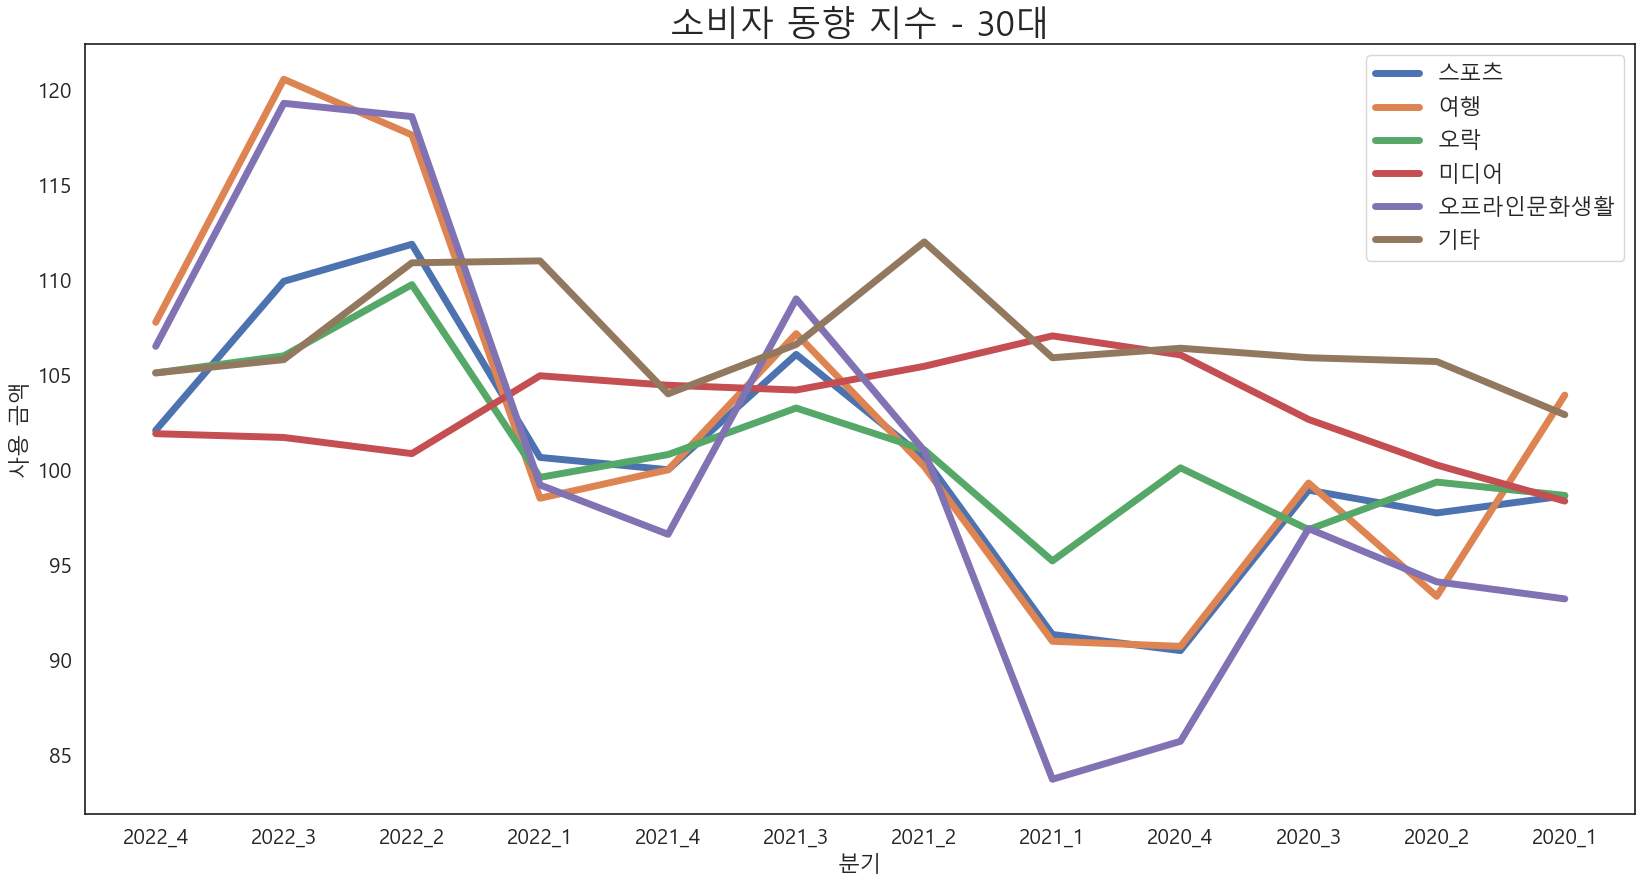

In [377]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(df_sports.variable.values, df_sports.value, label="스포츠", linewidth = 5) 
plt.plot(df_travel.variable.values, df_travel.value, label="여행", linewidth = 5) 
plt.plot(df_game.variable.values, df_game.value, label="오락", linewidth = 5) 
plt.plot(df_media.variable.values, df_media.value, label="미디어", linewidth = 5) 
plt.plot(df_offline.variable.values, df_offline.value, label="오프라인문화생활", linewidth = 5) 
plt.plot(df_etc.variable.values, df_etc.value, label="기타", linewidth = 5) 
plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 30대", fontsize = 25)

<Figure size 2000x3000 with 0 Axes>

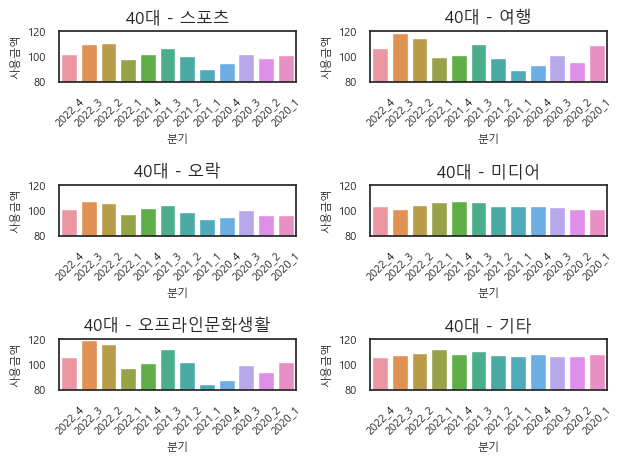

In [378]:
df_sports = data_40[data_40.Category == "스포츠"]
df_travel = data_40[data_40.Category == "여행"]
df_game = data_40[data_40.Category == "오락"]
df_media = data_40[data_40.Category == "미디어"]
df_offline = data_40[data_40.Category == "오프라인문화생활"]
df_etc = data_40[data_40.Category == "기타"]

plt.figure(figsize=(20,30))
fig, axes = plt.subplots(3,2)
rc('font', family=font)
sns.set_style("white")


# 스포츠
sns.barplot(x="variable", y="value", data=df_sports, ci = None, ax=axes[0][0])
axes[0][0].set_ylim(80, 120)
axes[0][0].set_xlabel("분기", fontsize = 8)
axes[0][0].set_ylabel("사용금액", fontsize = 8)
axes[0][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][0].tick_params(axis="y", labelsize=8) 
axes[0][0].set_title("40대 - 스포츠", fontsize = 12)

# 여행
sns.barplot(x="variable", y="value", data=df_travel, ci = None, ax=axes[0][1])
axes[0][1].set_ylim(80, 120)
axes[0][1].set_xlabel("분기", fontsize = 8)
axes[0][1].set_ylabel("사용금액", fontsize = 8)
axes[0][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][1].tick_params(axis="y", labelsize=8) 
axes[0][1].set_title("40대 - 여행", fontsize = 12)

# 오락
sns.barplot(x="variable", y="value", data=df_game, ci = None, ax=axes[1][0])
axes[1][0].set_ylim(80, 120)
axes[1][0].set_xlabel("분기", fontsize = 8)
axes[1][0].set_ylabel("사용금액", fontsize = 8)
axes[1][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][0].tick_params(axis="y", labelsize=8) 
axes[1][0].set_title("40대 - 오락", fontsize = 12)

# 미디어
sns.barplot(x="variable", y="value", data=df_media, ci = None, ax=axes[1][1])
axes[1][1].set_ylim(80, 120)
axes[1][1].set_xlabel("분기", fontsize = 8)
axes[1][1].set_ylabel("사용금액", fontsize = 8)
axes[1][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][1].tick_params(axis="y", labelsize=8) 
axes[1][1].set_title("40대 - 미디어", fontsize = 12)

# 오프라인
sns.barplot(x="variable", y="value", data=df_offline, ci = None, ax=axes[2][0])
axes[2][0].set_ylim(80, 120)
axes[2][0].set_xlabel("분기", fontsize = 8)
axes[2][0].set_ylabel("사용금액", fontsize = 8)
axes[2][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][0].tick_params(axis="y", labelsize=8) 
axes[2][0].set_title("40대 - 오프라인문화생활", fontsize = 12)


# 기타
sns.barplot(x="variable", y="value", data=df_etc, ci = None, ax=axes[2][1])
axes[2][1].set_ylim(80, 120)
axes[2][1].set_xlabel("분기", fontsize = 8)
axes[2][1].set_ylabel("사용금액", fontsize = 8)
axes[2][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][1].tick_params(axis="y", labelsize=8) 
axes[2][1].set_title("40대 - 기타", fontsize = 12)
fig.tight_layout()

Text(0.5, 1.0, '소비자 동향 지수 - 40대')

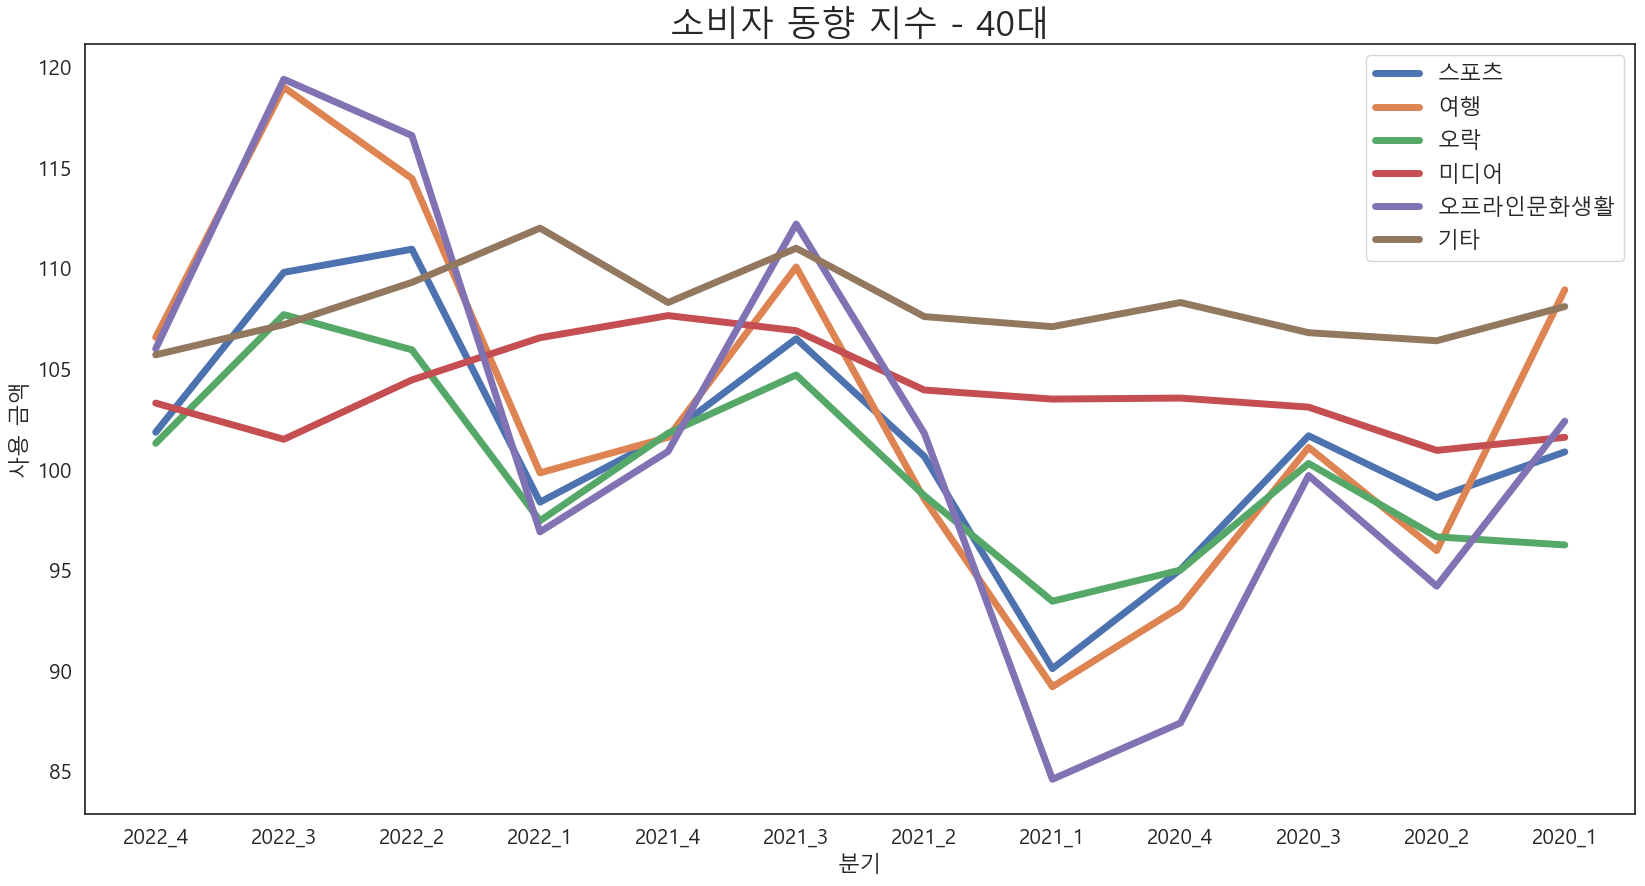

In [379]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(df_sports.variable.values, df_sports.value, label="스포츠", linewidth = 5) 
plt.plot(df_travel.variable.values, df_travel.value, label="여행", linewidth = 5) 
plt.plot(df_game.variable.values, df_game.value, label="오락", linewidth = 5) 
plt.plot(df_media.variable.values, df_media.value, label="미디어", linewidth = 5) 
plt.plot(df_offline.variable.values, df_offline.value, label="오프라인문화생활", linewidth = 5) 
plt.plot(df_etc.variable.values, df_etc.value, label="기타", linewidth = 5) 
plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 40대", fontsize = 25)

<Figure size 2000x3000 with 0 Axes>

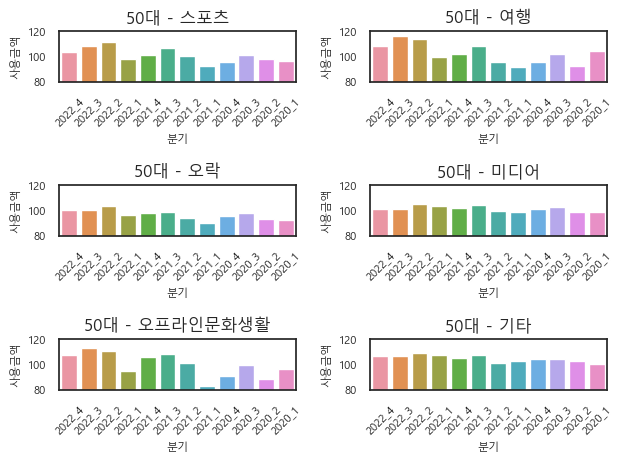

In [380]:
df_sports = data_50[data_50.Category == "스포츠"]
df_travel = data_50[data_50.Category == "여행"]
df_game = data_50[data_50.Category == "오락"]
df_media = data_50[data_50.Category == "미디어"]
df_offline = data_50[data_50.Category == "오프라인문화생활"]
df_etc = data_50[data_50.Category == "기타"]

plt.figure(figsize=(20,30))
fig, axes = plt.subplots(3,2)
rc('font', family=font)
sns.set_style("white")


# 스포츠
sns.barplot(x="variable", y="value", data=df_sports, ci = None, ax=axes[0][0])
axes[0][0].set_ylim(80, 120)
axes[0][0].set_xlabel("분기", fontsize = 8)
axes[0][0].set_ylabel("사용금액", fontsize = 8)
axes[0][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][0].tick_params(axis="y", labelsize=8) 
axes[0][0].set_title("50대 - 스포츠", fontsize = 12)

# 여행
sns.barplot(x="variable", y="value", data=df_travel, ci = None, ax=axes[0][1])
axes[0][1].set_ylim(80, 120)
axes[0][1].set_xlabel("분기", fontsize = 8)
axes[0][1].set_ylabel("사용금액", fontsize = 8)
axes[0][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][1].tick_params(axis="y", labelsize=8) 
axes[0][1].set_title("50대 - 여행", fontsize = 12)

# 오락
sns.barplot(x="variable", y="value", data=df_game, ci = None, ax=axes[1][0])
axes[1][0].set_ylim(80, 120)
axes[1][0].set_xlabel("분기", fontsize = 8)
axes[1][0].set_ylabel("사용금액", fontsize = 8)
axes[1][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][0].tick_params(axis="y", labelsize=8) 
axes[1][0].set_title("50대 - 오락", fontsize = 12)

# 미디어
sns.barplot(x="variable", y="value", data=df_media, ci = None, ax=axes[1][1])
axes[1][1].set_ylim(80, 120)
axes[1][1].set_xlabel("분기", fontsize = 8)
axes[1][1].set_ylabel("사용금액", fontsize = 8)
axes[1][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][1].tick_params(axis="y", labelsize=8) 
axes[1][1].set_title("50대 - 미디어", fontsize = 12)

# 오프라인
sns.barplot(x="variable", y="value", data=df_offline, ci = None, ax=axes[2][0])
axes[2][0].set_ylim(80, 120)
axes[2][0].set_xlabel("분기", fontsize = 8)
axes[2][0].set_ylabel("사용금액", fontsize = 8)
axes[2][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][0].tick_params(axis="y", labelsize=8) 
axes[2][0].set_title("50대 - 오프라인문화생활", fontsize = 12)


# 기타
sns.barplot(x="variable", y="value", data=df_etc, ci = None, ax=axes[2][1])
axes[2][1].set_ylim(80, 120)
axes[2][1].set_xlabel("분기", fontsize = 8)
axes[2][1].set_ylabel("사용금액", fontsize = 8)
axes[2][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][1].tick_params(axis="y", labelsize=8) 
axes[2][1].set_title("50대 - 기타", fontsize = 12)
fig.tight_layout()

Text(0.5, 1.0, '소비자 동향 지수 - 50대')

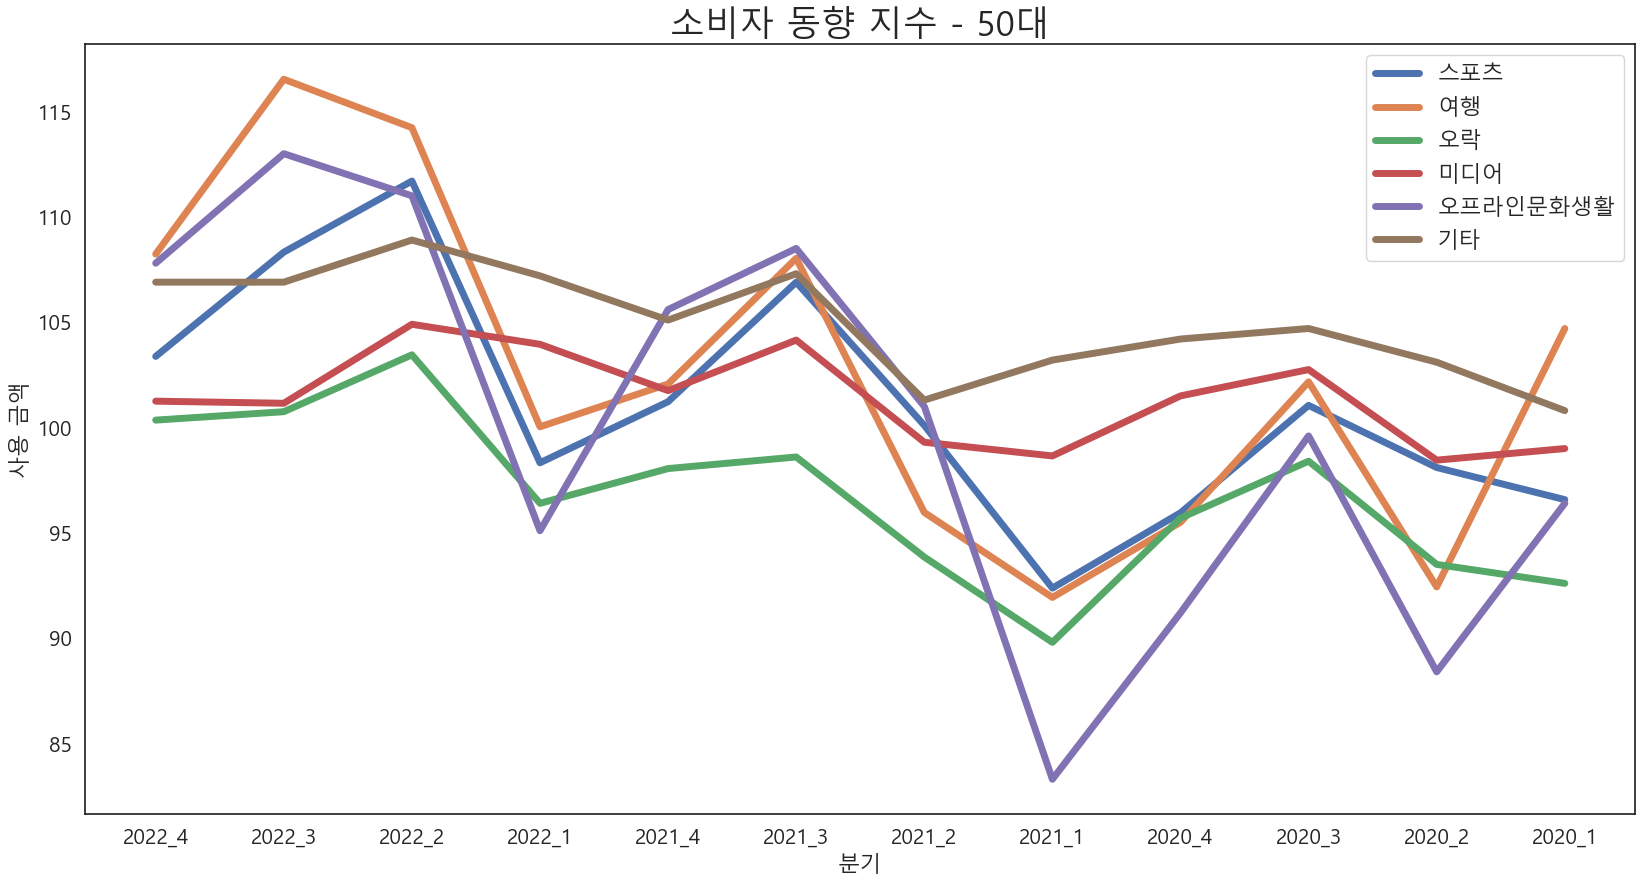

In [381]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(df_sports.variable.values, df_sports.value, label="스포츠", linewidth = 5) 
plt.plot(df_travel.variable.values, df_travel.value, label="여행", linewidth = 5) 
plt.plot(df_game.variable.values, df_game.value, label="오락", linewidth = 5) 
plt.plot(df_media.variable.values, df_media.value, label="미디어", linewidth = 5) 
plt.plot(df_offline.variable.values, df_offline.value, label="오프라인문화생활", linewidth = 5) 
plt.plot(df_etc.variable.values, df_etc.value, label="기타", linewidth = 5) 
plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 50대", fontsize = 25)

<Figure size 2000x3000 with 0 Axes>

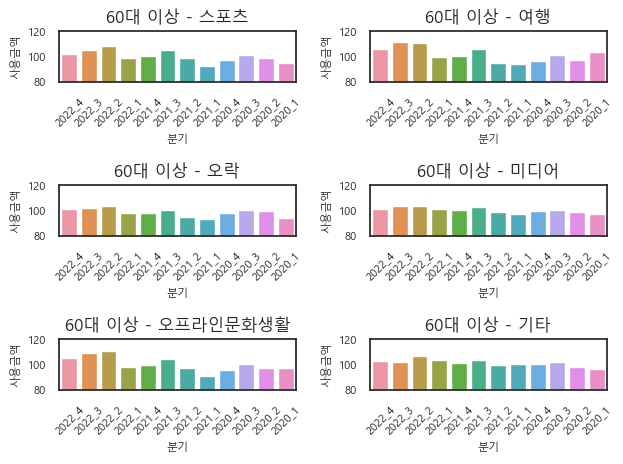

In [382]:
df_sports = data_60[data_60.Category == "스포츠"]
df_travel = data_60[data_60.Category == "여행"]
df_game = data_60[data_60.Category == "오락"]
df_media = data_60[data_60.Category == "미디어"]
df_offline = data_60[data_60.Category == "오프라인문화생활"]
df_etc = data_60[data_60.Category == "기타"]

plt.figure(figsize=(20,30))
fig, axes = plt.subplots(3,2)
rc('font', family=font)
sns.set_style("white")


# 스포츠
sns.barplot(x="variable", y="value", data=df_sports, ci = None, ax=axes[0][0])
axes[0][0].set_ylim(80, 120)
axes[0][0].set_xlabel("분기", fontsize = 8)
axes[0][0].set_ylabel("사용금액", fontsize = 8)
axes[0][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][0].tick_params(axis="y", labelsize=8) 
axes[0][0].set_title("60대 이상 - 스포츠", fontsize = 12)

# 여행
sns.barplot(x="variable", y="value", data=df_travel, ci = None, ax=axes[0][1])
axes[0][1].set_ylim(80, 120)
axes[0][1].set_xlabel("분기", fontsize = 8)
axes[0][1].set_ylabel("사용금액", fontsize = 8)
axes[0][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[0][1].tick_params(axis="y", labelsize=8) 
axes[0][1].set_title("60대 이상 - 여행", fontsize = 12)

# 오락
sns.barplot(x="variable", y="value", data=df_game, ci = None, ax=axes[1][0])
axes[1][0].set_ylim(80, 120)
axes[1][0].set_xlabel("분기", fontsize = 8)
axes[1][0].set_ylabel("사용금액", fontsize = 8)
axes[1][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][0].tick_params(axis="y", labelsize=8) 
axes[1][0].set_title("60대 이상 - 오락", fontsize = 12)

# 미디어
sns.barplot(x="variable", y="value", data=df_media, ci = None, ax=axes[1][1])
axes[1][1].set_ylim(80, 120)
axes[1][1].set_xlabel("분기", fontsize = 8)
axes[1][1].set_ylabel("사용금액", fontsize = 8)
axes[1][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[1][1].tick_params(axis="y", labelsize=8) 
axes[1][1].set_title("60대 이상 - 미디어", fontsize = 12)

# 오프라인
sns.barplot(x="variable", y="value", data=df_offline, ci = None, ax=axes[2][0])
axes[2][0].set_ylim(80, 120)
axes[2][0].set_xlabel("분기", fontsize = 8)
axes[2][0].set_ylabel("사용금액", fontsize = 8)
axes[2][0].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][0].tick_params(axis="y", labelsize=8) 
axes[2][0].set_title("60대 이상 - 오프라인문화생활", fontsize = 12)


# 기타
sns.barplot(x="variable", y="value", data=df_etc, ci = None, ax=axes[2][1])
axes[2][1].set_ylim(80, 120)
axes[2][1].set_xlabel("분기", fontsize = 8)
axes[2][1].set_ylabel("사용금액", fontsize = 8)
axes[2][1].tick_params(axis="x", labelsize=8, rotation = 45) 
axes[2][1].tick_params(axis="y", labelsize=8) 
axes[2][1].set_title("60대 이상 - 기타", fontsize = 12)
fig.tight_layout()

Text(0.5, 1.0, '소비자 동향 지수 - 60대 이상')

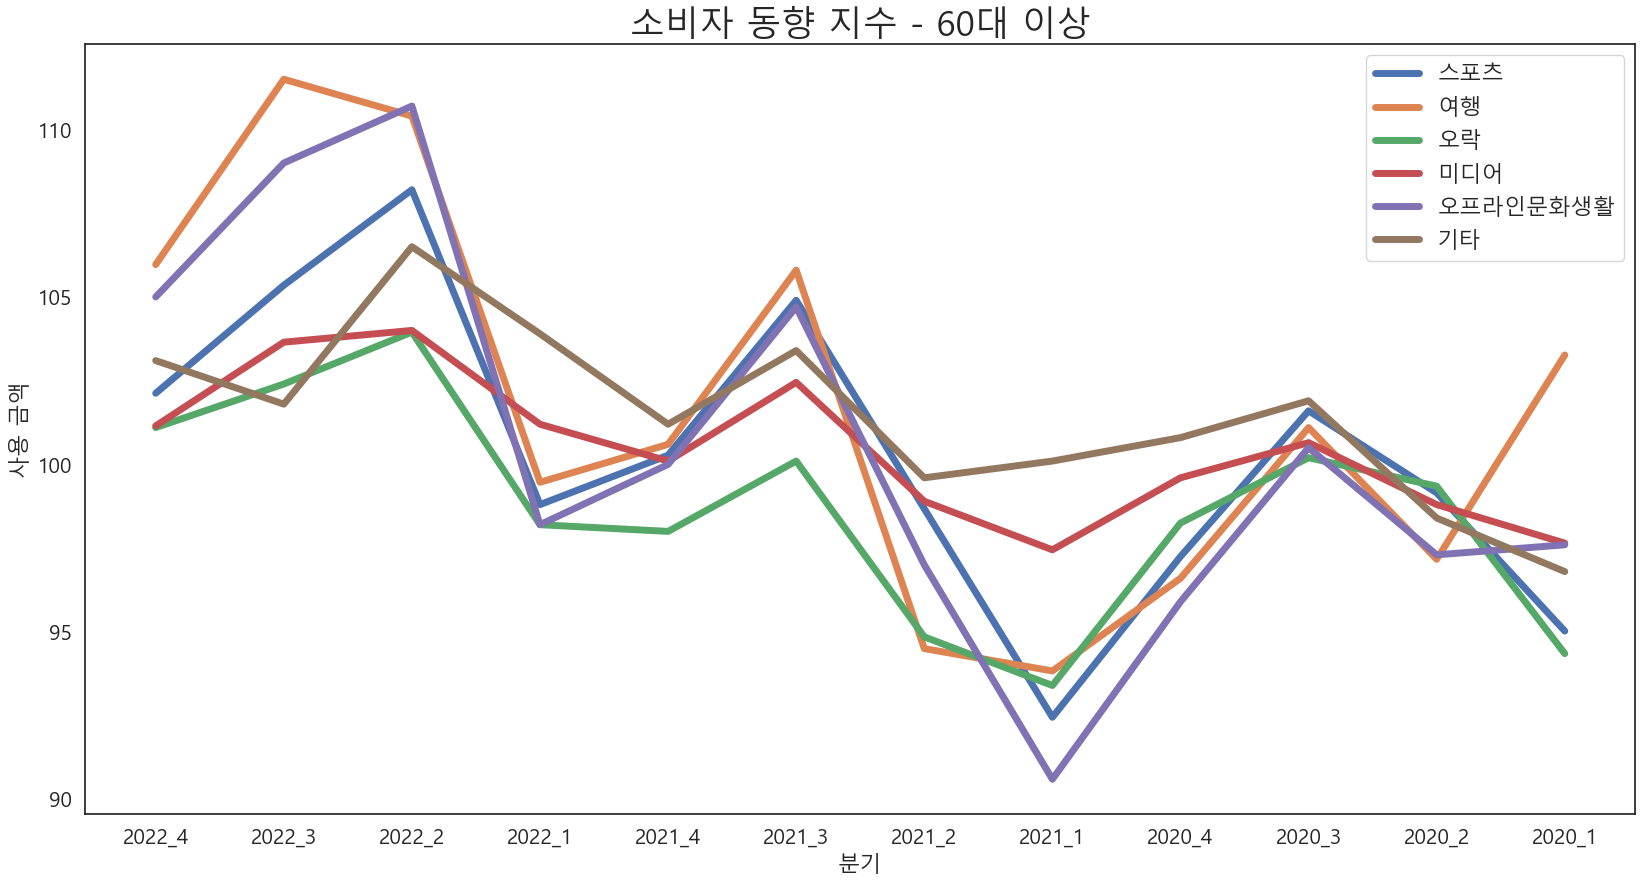

In [383]:
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
fig = plt.figure(figsize=(20,10))
plt.plot(df_sports.variable.values, df_sports.value, label="스포츠", linewidth = 5) 
plt.plot(df_travel.variable.values, df_travel.value, label="여행", linewidth = 5) 
plt.plot(df_game.variable.values, df_game.value, label="오락", linewidth = 5) 
plt.plot(df_media.variable.values, df_media.value, label="미디어", linewidth = 5) 
plt.plot(df_offline.variable.values, df_offline.value, label="오프라인문화생활", linewidth = 5) 
plt.plot(df_etc.variable.values, df_etc.value, label="기타", linewidth = 5) 
plt.legend(fontsize = 16)
plt.xlabel("분기", fontsize = 16)
plt.ylabel("사용 금액", fontsize = 16)
plt.title("소비자 동향 지수 - 60대 이상", fontsize = 25)